# IMDB Movie Review Classification

In [1]:
# Lets use the custom function  with autoreload option

%load_ext autoreload
%autoreload 2

import custom_function as fn

In [2]:
# Load Imports

import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option("display.max_columns",50)
pd.set_option('display.max_colwidth', 250)

# Load imports for NLP
import nltk
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import joblib
import tensorflow as tf
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers, regularizers

In [3]:
# Setting random seed for reproducibility
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)
tf.config.experimental.enable_op_determinism()

## Load the Data


Load the joblib containing the data frame from sentiment analysis movie review of the project.
Drop any reviews that do not have a rating.
Use the original review column as your X and the classification target (High/Low Rating Reviews) as your y.

In [4]:
# load data
df = joblib.load('Data/nlp/processed-nlp-data.joblib')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345 entries, 0 to 8649
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       6345 non-null   object 
 1   movie_id        6345 non-null   int64  
 2   imdb_id         6345 non-null   object 
 3   original_title  6345 non-null   object 
 4   review          6345 non-null   object 
 5   rating          6345 non-null   float64
 6   target          2034 non-null   object 
 7   tokens          6345 non-null   object 
 8   lemmas          6345 non-null   object 
 9   tokens-joined   6345 non-null   object 
 10  lemmas-joined   6345 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 594.8+ KB


In [5]:
# Drop the rows with any reviews missing

df.dropna(subset =['target'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 1 to 8647
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       2034 non-null   object 
 1   movie_id        2034 non-null   int64  
 2   imdb_id         2034 non-null   object 
 3   original_title  2034 non-null   object 
 4   review          2034 non-null   object 
 5   rating          2034 non-null   float64
 6   target          2034 non-null   object 
 7   tokens          2034 non-null   object 
 8   lemmas          2034 non-null   object 
 9   tokens-joined   2034 non-null   object 
 10  lemmas-joined   2034 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 190.7+ KB


**Use the original review column as your X and the classification target (High/Low Rating Reviews) as your y.**

In [6]:
# here we have target as high/low rating reviews
df['target'].value_counts()

high    1091
low      943
Name: target, dtype: int64

In [7]:
# Define X and y

X = df['review']
y = df['target']

In [8]:
y.unique()

array(['high', 'low'], dtype=object)

## Train Test Split for modeling


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=123)
X_train.head()

5977    Creed II takes pieces of the previous Rocky stories and is able to completely transform them into a better, more emotional story that can easily resonate with audiences.\r\n\r\nIf I have one big complaint about this installment, it would be that ...
3848                                                                                                                                                                                                          This is the most incredible movie I've ever seen :)
5182    **UNfortunately-FORGETTABLE film!**\r\n\r\nDirectional debut for a producer. I think she did well. But the film had a major issue. The film was decent with nice performances and production quality. Though it came at a wrong era. Came in too late,...
5106    Sensational! <em>'Coco'</em> is straight into my top five of Disney animations.\r\n\r\nThe whole 105 minutes are a joy to watch, thanks to its rich and highly meaningful story alongside the wonderful animation and shar

## CountVectorizer

In [10]:
count_vectorizer = CountVectorizer(stop_words= None, ngram_range= (1,2))

count_vectorizer.fit(X_train)

CountVectorizer(ngram_range=(1, 2))

In [11]:
# get the vocabulary from vectorizer

vocab_size = count_vectorizer.vocabulary_
len(vocab_size)

198706

## Modeling (ML)

### Pipeline Multinomial and Logisticregression

In [12]:
# Create a pipeline with countvectorizer and model

bayes_pipe = Pipeline([('vectorizer', CountVectorizer()), ('clf', MultinomialNB())])
lr_pipe = Pipeline([('vectorizer', CountVectorizer()), ('clf', LogisticRegression(max_iter =500))])


### Multinomial NB

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.98      0.97      0.98       865
         low       0.97      0.98      0.98       762

    accuracy                           0.98      1627
   macro avg       0.98      0.98      0.98      1627
weighted avg       0.98      0.98      0.98      1627



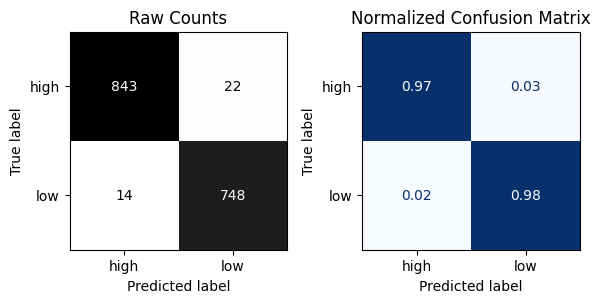


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.88      0.91      0.89       226
         low       0.88      0.84      0.86       181

    accuracy                           0.88       407
   macro avg       0.88      0.87      0.88       407
weighted avg       0.88      0.88      0.88       407



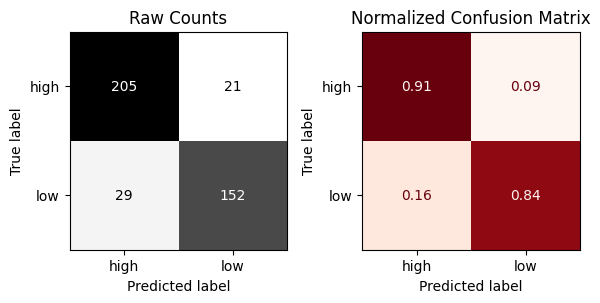

In [13]:
# Fit an evaluate a Naive Bayes Classifier model
bayes_pipe.fit(X_train, y_train)
fn.evaluate_classification(bayes_pipe, X_train, y_train, X_test, y_test)

### Logistic Regression

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       865
         low       1.00      1.00      1.00       762

    accuracy                           1.00      1627
   macro avg       1.00      1.00      1.00      1627
weighted avg       1.00      1.00      1.00      1627



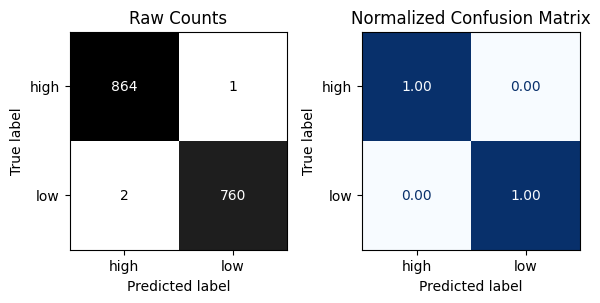


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.85      0.85      0.85       226
         low       0.82      0.82      0.82       181

    accuracy                           0.84       407
   macro avg       0.84      0.84      0.84       407
weighted avg       0.84      0.84      0.84       407



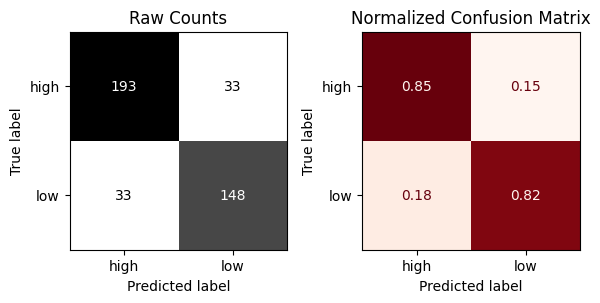

In [14]:
## Fit an evaluate a Logistic Regression model
lr_pipe.fit(X_train, y_train)
fn.evaluate_classification(lr_pipe, X_train, y_train, X_test, y_test)

With testing accuracy of 89% and training accuracy of 100% clearly model shows overfitting. Lets try Logistic  regression

Logistic regression also overfit as Naive Bayes. Now, cosidering applying GridSearch to tune the model and reduce overfitting.

### GridSearch Text Vectorization

Construct a grid of parameters for the text vectorization step. 

Consider trying with
- CountVectorizer/TfidfVectorizer
- stopwords
- ngram_range
- min_df/max_df

In [15]:
lr_pipe.get_params()

{'memory': None,
 'steps': [('vectorizer', CountVectorizer()),
  ('clf', LogisticRegression(max_iter=500))],
 'verbose': False,
 'vectorizer': CountVectorizer(),
 'clf': LogisticRegression(max_iter=500),
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__decode_error': 'strict',
 'vectorizer__dtype': numpy.int64,
 'vectorizer__encoding': 'utf-8',
 'vectorizer__input': 'content',
 'vectorizer__lowercase': True,
 'vectorizer__max_df': 1.0,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__preprocessor': None,
 'vectorizer__stop_words': None,
 'vectorizer__strip_accents': None,
 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vectorizer__tokenizer': None,
 'vectorizer__vocabulary': None,
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__l1_ratio': None,
 'clf__max_iter': 500,
 'clf__multi_class': 'auto',
 'clf__n_jobs':

In [16]:
bayes_pipe.get_params()

{'memory': None,
 'steps': [('vectorizer', CountVectorizer()), ('clf', MultinomialNB())],
 'verbose': False,
 'vectorizer': CountVectorizer(),
 'clf': MultinomialNB(),
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__decode_error': 'strict',
 'vectorizer__dtype': numpy.int64,
 'vectorizer__encoding': 'utf-8',
 'vectorizer__input': 'content',
 'vectorizer__lowercase': True,
 'vectorizer__max_df': 1.0,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__preprocessor': None,
 'vectorizer__stop_words': None,
 'vectorizer__strip_accents': None,
 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vectorizer__tokenizer': None,
 'vectorizer__vocabulary': None,
 'clf__alpha': 1.0,
 'clf__class_prior': None,
 'clf__fit_prior': True,
 'clf__force_alpha': 'warn'}

In [17]:
# Define the parameter grid for vectorizers
# shared params
param_grid = {
    'vectorizer__max_df': [0.7,0.8,0.9],
    'vectorizer__min_df': [2,3,4,5],
    'vectorizer__stop_words': [None,'english'],
    'vectorizer__ngram_range': [(1, 2),(1,3)],   
}

# params for countVectorizer
param_grid_count = {
    'vectorizer':[CountVectorizer()],
    **param_grid
}

# params for TfidfVectorizer
param_grid_tfidf = {
    'vectorizer': [TfidfVectorizer()],
    "vectorizer__norm": ["l1", "l2"],
    "vectorizer__use_idf": [True, False],
    **param_grid
}

#combining params
vect_params_combined = [param_grid_count, param_grid_tfidf]

# params for models need to set

params_MNB = {
    'clf' : [MultinomialNB()],
    'clf__alpha' : [.5, 1],
}

params_lr = {
    'clf': [LogisticRegression(random_state = 123, solver='lbfgs',max_iter=500)],
    'clf__C' : [.1, 1, 10, 100],
}

model_params_combined = [params_MNB, params_lr]



In [18]:
# using iterpools to create all combinations of vectorizers
import itertools
combined_params = list(itertools.product(vect_params_combined, model_params_combined))
combined_params[1]

({'vectorizer': [CountVectorizer()],
  'vectorizer__max_df': [0.7, 0.8, 0.9],
  'vectorizer__min_df': [2, 3, 4, 5],
  'vectorizer__stop_words': [None, 'english'],
  'vectorizer__ngram_range': [(1, 2), (1, 3)]},
 {'clf': [LogisticRegression(max_iter=500, random_state=123)],
  'clf__C': [0.1, 1, 10, 100]})

In [19]:
#use loop to combine the parameter grids for each combination
final_params = []
for vector_params, model_params in combined_params:
    combined = {**vector_params, **model_params}
    final_params.append(combined)
final_params[0]

{'vectorizer': [CountVectorizer()],
 'vectorizer__max_df': [0.7, 0.8, 0.9],
 'vectorizer__min_df': [2, 3, 4, 5],
 'vectorizer__stop_words': [None, 'english'],
 'vectorizer__ngram_range': [(1, 2), (1, 3)],
 'clf': [MultinomialNB()],
 'clf__alpha': [0.5, 1]}

### GridSearchCV

In [20]:
%%time
#combine the best model using GridSearchCV
grid_search = GridSearchCV(bayes_pipe, final_params, cv=3, scoring='accuracy', 
                          verbose=1, n_jobs=-1)
#fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
CPU times: user 10.9 s, sys: 9.58 s, total: 20.4 s
Wall time: 5min 17s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'clf': [MultinomialNB(alpha=1)],
                          'clf__alpha': [0.5, 1],
                          'vectorizer': [CountVectorizer(max_df=0.7, min_df=3,
                                                         ngram_range=(1, 3))],
                          'vectorizer__max_df': [0.7, 0.8, 0.9],
                          'vectorizer__min_df': [2, 3, 4, 5],
                          'vectorizer__ngram_range': [(1, 2), (1,...
                         {'clf': [LogisticRegression(max_iter=500,
                                                     random_state=123)],
                          'clf__C': [0.1, 1, 10, 100],
                          'vectorizer': [TfidfVectorizer()],
                          'vectorizer__max_df': [0.7, 0.8, 0.9],
                          'vectorizer__min_df': [2, 3, 4, 5],
                          'vectorizer__ngram_range': [(1, 2), (1, 3)],
                          'vectorizer__norm': ['l1', 'l2'],
                          'vectorizer__stop_words': [None, 'english'],
                          'vectorizer__use_idf': [True, False]}],
             scoring='accuracy', verbose=1)

In [21]:
# get the best combination
grid_search.best_params_

{'clf': MultinomialNB(alpha=1),
 'clf__alpha': 1,
 'vectorizer': CountVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 3)),
 'vectorizer__max_df': 0.7,
 'vectorizer__min_df': 3,
 'vectorizer__ngram_range': (1, 3),
 'vectorizer__stop_words': None}

### Best model from gridsearch

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       865
         low       0.99      0.98      0.99       762

    accuracy                           0.99      1627
   macro avg       0.99      0.99      0.99      1627
weighted avg       0.99      0.99      0.99      1627



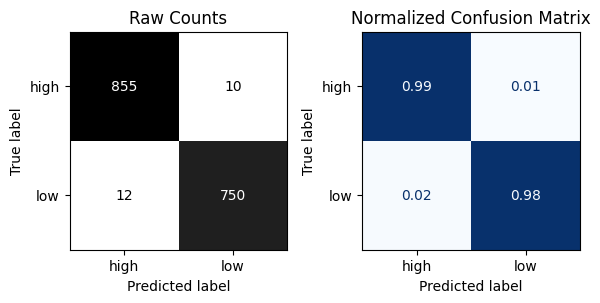


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.89      0.90      0.89       226
         low       0.87      0.86      0.86       181

    accuracy                           0.88       407
   macro avg       0.88      0.88      0.88       407
weighted avg       0.88      0.88      0.88       407



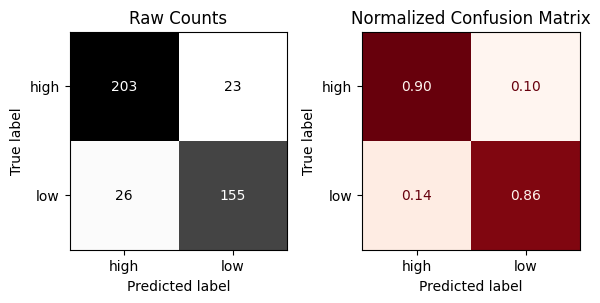

In [22]:
#evaluate best model
best_model = grid_search.best_estimator_
fn.evaluate_classification(best_model, X_train, y_train, X_test, y_test)

With best parameters it gives training accuracy of 99% and testing as 88%. This is overfitting. We can still tune our model with more hypertuning. For now we will move on to Deep NLP.


### Save the best model as Joblib

In [23]:
# not sure why to save train and test data but instead preprocessing steps are alreday saved so skipping this step

# # Save training data
# fpath_train_data = "Data/nlp/train-data.joblib"
# joblib.dump([X_train, y_train],fpath_train_data)
    
# # Save test data
# fpath_test_data = "Data/nlp/test-data.joblib"
# joblib.dump([X_test, y_test],fpath_test_data)
    
# Saving the best model 
best_model_path  = "models/best-ml-gridsearch-model.joblib"
joblib.dump(best_model, best_model_path)

['models/best-ml-gridsearch-model.joblib']

## Modeling - Deep NLP

### Prepare Tensorflow Datasets ( Train-Test-Val Datasets)

Since we already have X and y, we will first encode y using LabelEncoder and make 2 datast objects using tf.data.Dataset.from_tensor_slices.
1. The training dataset using X_train, y_train (we will create new train and tesst dataset with encoded y)
2. The val/test dataset using X_test, y-test.

In [88]:
#define X and y and convert rating_category to integers
X = df['review']
y_encoded = pd.Series(LabelEncoder().fit_transform(df['target']))
y_encoded.value_counts()

0    1091
1     943
dtype: int64

In [89]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.25,
                                                    random_state=123)
X_train.head(2)

4346    **Nothing is frustrating than losing a best friend!**\r\n\r\nThere are lots of stupid teen films in the recent time. But don't confuse it with them. It is a fine, sensible drama with some fun. It's a dream debut for the director. Being a woman an...
2110    A great ride of a movie. Bruce Willis is perfectly cast as Frank Moses and downplays his character like no one else could. Picture any other star in this role and it's a completely different movie. And where else are you going to see Helen Mirren...
Name: review, dtype: object

In [90]:
## We will then split the val/test dataset into a val/test split.

# Convert training data to Dataset Object
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# Shuffle dataset once
train_ds = train_ds.shuffle(buffer_size=len(train_ds), seed=123,
                            reshuffle_each_iteration=False)

Create a test and validation dataset using X_test,y_test

In [91]:
# Convert test to dataset object and split
val_test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_test_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [92]:
# Calculate # of samples for 50/50 val/test split
n_val_samples = int(len(val_test_ds) *.5)
n_val_samples

254

In [93]:
## Perform the val/test split

## Create the validation dataset using .take
val_ds = val_test_ds.take(n_val_samples)

## Create the test dataset using skip
test_ds = val_test_ds.skip(n_val_samples)

In [94]:
# Comparing the lengths of all 3 splits
len(train_ds), len(val_ds), len(test_ds)

(1525, 254, 255)

In [95]:
# Shuffle only the training data every epoch
train_ds = train_ds.shuffle(len(train_ds),seed = 123)

In [96]:
#  Setting the batch_size for all datasets
import math
BATCH_SIZE =32

# use .batch to add batching to all 3 datasets
train_ds = train_ds.batch(BATCH_SIZE)
val_ds = val_ds.batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)


# # Calculating the number of batches
# train_batches = math.ceil(len((train_ds))/BATCH_SIZE)
# val_batches = math.ceil(len(val_ds)/BATCH_SIZE)
# test_batches = math.ceil((len(test_ds))/BATCH_SIZE)

# Confirm the number of batches in each
print (f' There are {len(train_ds)} training batches.')
print (f' There are {len(val_ds)} validation batches.')
print (f' There are {len(test_ds)} testing batches.')

 There are 48 training batches.
 There are 8 validation batches.
 There are 8 testing batches.


### Create Keras Text Vectorization layer

Lets find appropriate sequence length

In [97]:
# Create a column for length of tokens in each text 
df['length_token'] = df['review'].map( lambda x: len(x.split(" ")))
df['length_token'].describe()

count    2034.000000
mean      234.543756
std       272.990492
min         1.000000
25%        67.000000
50%       160.500000
75%       304.000000
max      4017.000000
Name: length_token, dtype: float64

In [98]:
# Text Vectorization Parameters

# Lets take sequence length as 300 
SEQUENCE_LENGTH = 300
sequence_vectorizer, lookup = fn.make_text_vectorization_layer(train_ds, standardize="lower_and_strip_punctuation",output_mode='int', 
                                                      output_sequence_length=SEQUENCE_LENGTH, 
                                                      verbose=True)


tf.keras.layers.TextVectorization(
{   'batch_input_shape': (None,),
    'dtype': 'string',
    'encoding': 'utf-8',
    'idf_weights': None,
    'max_tokens': None,
    'name': 'text_vectorization_2',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 300,
    'pad_to_max_tokens': False,
    'ragged': False,
    'sparse': False,
    'split': 'whitespace',
    'standardize': 'lower_and_strip_punctuation',
    'trainable': True,
    'vocabulary': None,
    'vocabulary_size': 24483}
)


In [99]:
# Obtaining the text from the training dataset 
ds_texts = train_ds.map(lambda x, y: x)

# Training (adapt on training text data))
sequence_vectorizer.adapt(ds_texts)

# Getting vocabulary size
VOCAB_SIZE = sequence_vectorizer.vocabulary_size()
VOCAB_SIZE

24483

In [100]:
ds_texts

<_MapDataset element_spec=TensorSpec(shape=(None,), dtype=tf.string, name=None)>

#### Define Embedding size

In [101]:
# Embedding dimensions
EMBED_DIM = 100 

### Build RNN models with TextVectorization Layer

In [102]:

print(f' EMBED_DIM: {EMBED_DIM}')
print(f' SEQUENCE_LENGTH: {SEQUENCE_LENGTH}')
print(f' VOCAB_SIZE: {VOCAB_SIZE}')

 EMBED_DIM: 100
 SEQUENCE_LENGTH: 300
 VOCAB_SIZE: 24483


#### Simple RNN

In [103]:
def build_rnn_model(text_vectorization_layer):
    VOCAB_SIZE = text_vectorization_layer.vocabulary_size()
    SEQUENCE_LENGTH = sequence_vectorizer.get_config()['output_sequence_length']
    
    
    # Define sequential model with pre-trained vectorization layer and *new* embedding layer
    model = Sequential([
        text_vectorization_layer,
        layers.Embedding(input_dim=VOCAB_SIZE,
                                  output_dim=EMBED_DIM, 
                                  input_length=SEQUENCE_LENGTH)
        ])
        
    # Add *new* LSTM layer
    model.add(layers.SimpleRNN(32)) #BEST=32
    
    # Add output layer
    model.add(layers.Dense(1, activation='sigmoid'))
 
    # Compile the model
    model.compile(optimizer=optimizers.legacy.Adam(learning_rate = .001), 
                  loss='bce',
                  metrics=['accuracy'])
    
    model.summary()
    return model

def get_callbacks(patience=3, monitor='val_accuracy'):
    early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor)
    return [early_stop]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 300)              0         
 ectorization)                                                   
                                                                 
 embedding_7 (Embedding)     (None, 300, 100)          2448300   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,452,589
Trainable params: 2,452,589
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
48/48 [==============================] - 1652s 34s/step - loss: 0.6974 - accuracy: 0.4990 - val_los

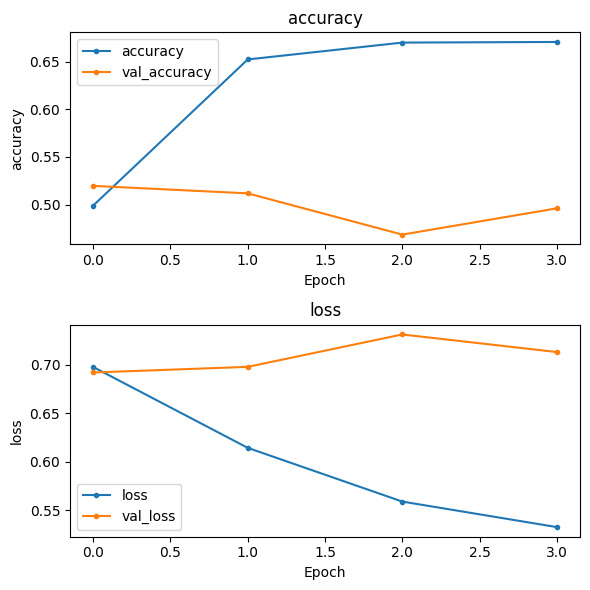


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       813
           1       1.00      0.31      0.48       712

    accuracy                           0.68      1525
   macro avg       0.81      0.66      0.62      1525
weighted avg       0.80      0.68      0.63      1525



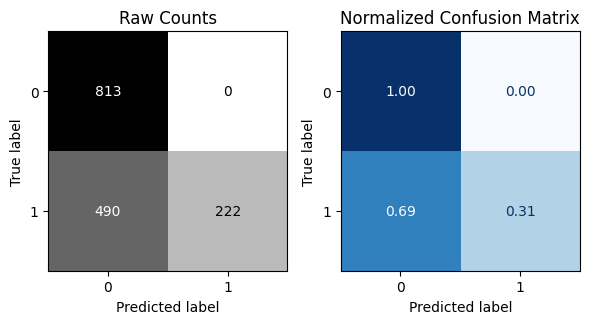


- Evaluating Training Data:
48/48 [==============================] - 172s 4s/step - loss: 0.5125 - accuracy: 0.6787
{'loss': 0.512535810470581, 'accuracy': 0.6786885261535645}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.81      0.65       141
           1       0.40      0.16      0.23       114

    accuracy                           0.52       255
   macro avg       0.47      0.48      0.44       255
weighted avg       0.48      0.52      0.46       255



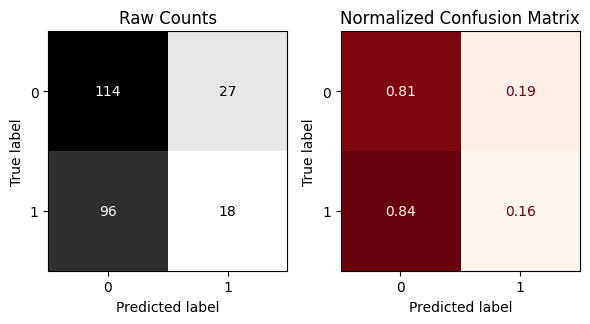


- Evaluating Test Data:
8/8 [==============================] - 30s 4s/step - loss: 0.7275 - accuracy: 0.5176
{'loss': 0.7274977564811707, 'accuracy': 0.5176470875740051}


In [104]:
# Build the lstm model and specify the vectorizer
rnn_model = build_rnn_model(sequence_vectorizer)

# Defien number of epocs
EPOCHS = 3
# Fit the model
history = rnn_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)
#fn.plot_history(history,figsize=(6,4))

# Obtaining the results
rnn_results = fn.evaluate_classification_network(rnn_model, 
                                             X_train=train_ds, 
                                             X_test=test_ds, 
                                             history=history
                                            );

In [ ]:
# Save the model in tf format 
fpath_model = "Models/nlp/simplernn"
rnn_model.save(fpath_model, save_format='tf')

#### LSTM

In [62]:
# Building the lstm model and specifying the vectorizer
lstm_model = build_lstm_model(sequence_vectorizer)
# Defining number of epocs
EPOCHS = 3
# Fitting the model
history = lstm_model.fit(train_ds,
                         epochs=EPOCHS,
                         validation_data=val_ds,
                         callbacks=get_callbacks()
                        )

# Obtaining the results
lstm_results = fn.evaluate_classification_network(lstm_model, 
                                             X_train=train_ds, 
                                             X_test=test_ds, 
                                             history=history
                                            );

NameError: name 'classes' is not defined